<a href="https://colab.research.google.com/github/Ewertongomes05/imersao-alura-dados/blob/Aulas-Colab/Aulas_de_Python_imersao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Analise de dados com Pandas

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv')


In [20]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [22]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [23]:
df.shape

(133349, 11)

In [24]:
linhas, colunas = df.shape[0], df.shape[1]
print("linhas: ", linhas)
print("Colunas: ", colunas)

linhas:  133349
Colunas:  11


In [25]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [26]:
df.rename(columns={
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}, inplace=True)

df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [27]:
df['senioridade'] = df['senioridade'].replace({
    'SE': 'Senior',
    'MI': 'Junior',
    'EN': 'Pleno',
    'EX': 'Executivo'
})
df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Junior,40465
Pleno,12443
Executivo,3200


In [28]:
df['contrato'] = df['contrato'].replace({
    'PT': 'Tempo Integral',
    'FT': 'Tempo Parcial',
    'FL': 'Freelancer',
    'CT': 'Contrato'
})
df['contrato'].value_counts()


,count
contrato,
Tempo Parcial,132563
Contrato,394
Tempo Integral,376
Freelancer,16


In [29]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [30]:
df['remoto'] = df['remoto'].replace({
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
})

df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [31]:
df['tamanho_empresa'] = df['tamanho_empresa'].replace({
    'S': 'Pequena',
    'M': 'Media',
    'L': 'Grande'
})
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Media,129561
Grande,3574
Pequena,214


In [32]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Parcial,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Tempo Parcial,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Junior,Tempo Parcial,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Junior,Tempo Parcial,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Pleno,Tempo Parcial,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [33]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Parcial,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [34]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Aula 2 - Preparação e limpeza de dados

In [35]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [36]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Parcial,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Tempo Parcial,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Junior,Tempo Parcial,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Junior,Tempo Parcial,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Pleno,Tempo Parcial,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [37]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [38]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [39]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Parcial,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Junior,Tempo Parcial,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Pleno,Tempo Parcial,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Tempo Parcial,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Tempo Parcial,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Tempo Parcial,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Tempo Parcial,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Pleno,Tempo Parcial,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Junior,Tempo Parcial,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Junior,Tempo Parcial,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [40]:
import numpy as np
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniel', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
                            })
#Media
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
# Mediana, usado para não dar valores descrepantes
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniel,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [41]:
#Completa com o valor nulo com o valor anterior.
df_temperaturas = pd.DataFrame({
    "Dia": ["segunda", "terça", "quarta", "quinta", "sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["Preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()
(df_temperaturas)

,Dia,Temperatura,Preenchido_ffill
0,segunda,30.0,30.0
1,terça,NaN,30.0
2,quarta,NaN,30.0
3,quinta,28.0,28.0
4,sexta,27.0,27.0


In [42]:
#Completa com o valor nulo com o valor a frente.
df_temperaturas = pd.DataFrame({
    "Dia": ["segunda", "terça", "quarta", "quinta", "sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["Preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()
(df_temperaturas)

,Dia,Temperatura,Preenchido_bfill
0,segunda,30.0,30.0
1,terça,NaN,28.0
2,quarta,NaN,28.0
3,quinta,28.0,28.0
4,sexta,27.0,27.0


In [43]:
#Preencher valores Null com valores já pré definidos
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniel', 'Val'],
    'cidade': ['São Paulo', np.nan, 'Coritiba', np.nan, 'Belem']
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Desconhecida')
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Desconhecida
2,Carlos,Coritiba,Coritiba
3,Daniel,NaN,Desconhecida
4,Val,Belem,Belem


In [44]:
#Dropar salarios NaN
df_limpo = df.dropna()


In [45]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [46]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Parcial,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Tempo Parcial,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Junior,Tempo Parcial,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Junior,Tempo Parcial,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Pleno,Tempo Parcial,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [47]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [48]:
#Trocar o tipo de dados de um campo
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))
df_limpo = df_limpo.assign(salario = df_limpo['salario'].astype('float64'))

# Aula 3 - Visualização de Dados

<Axes: title={'center': 'Senioridade'}, xlabel='senioridade'>

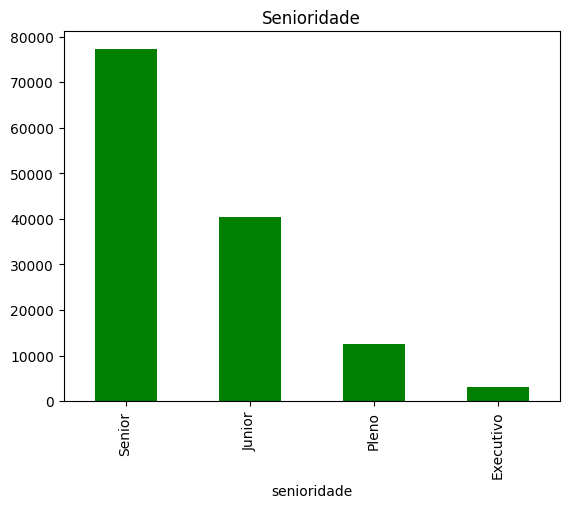

In [49]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Senioridade', color='green')

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='senioridade', ylabel='usd'>

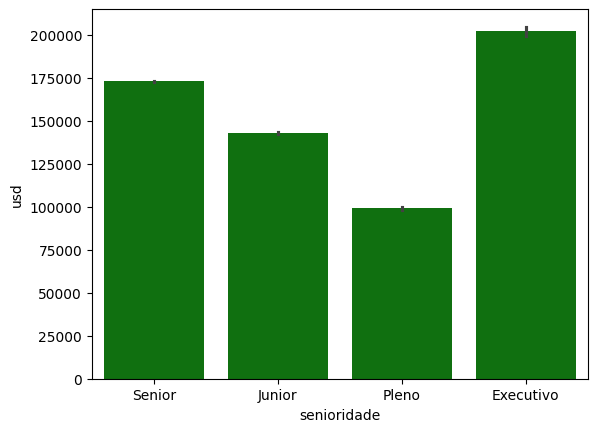

In [51]:
sns.barplot(data=df_limpo, x='senioridade', y='usd', color='green')

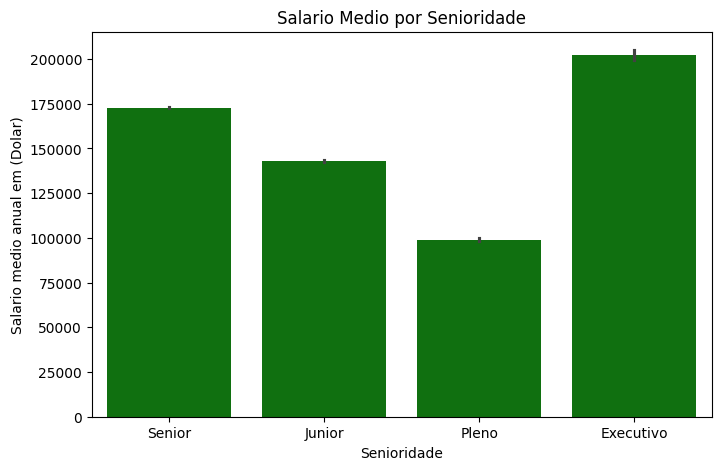

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', color='green')
plt.title('Salario Medio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salario medio anual em (Dolar)')
plt.show()

<Axes: xlabel='senioridade'>

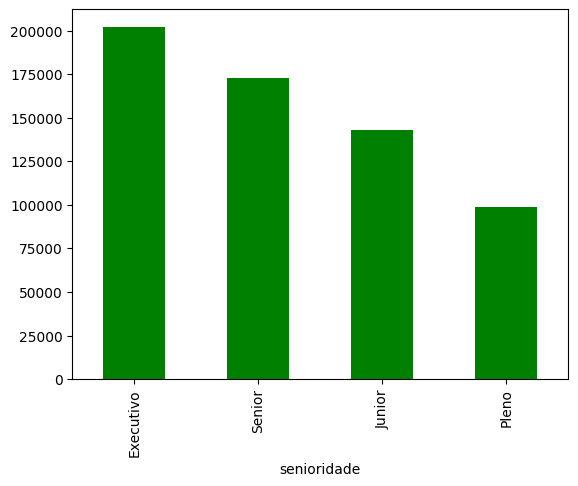

In [53]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).plot(kind='bar', color='green')

In [54]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index

In [55]:
ordem

Index(['Pleno', 'Junior', 'Senior', 'Executivo'], dtype='object', name='senioridade')

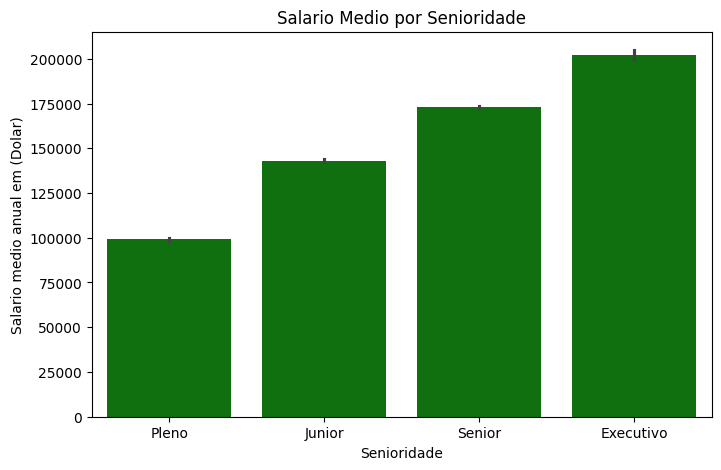

In [56]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', color='green', order=ordem)
plt.title('Salario Medio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salario medio anual em (Dolar)')
plt.show()

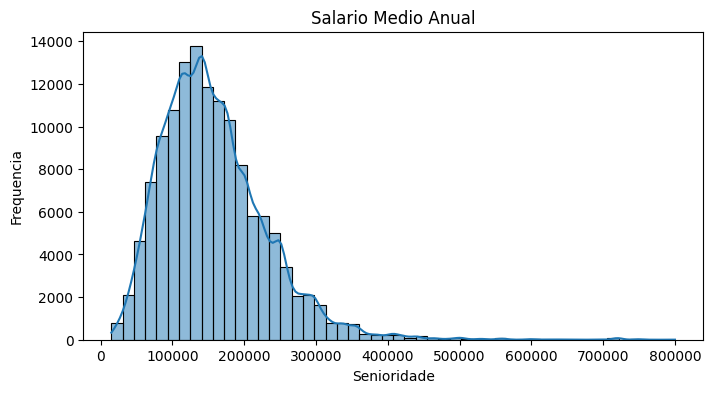

In [57]:
plt.figure(figsize=(8,4))
sns.histplot(data=df_limpo['usd'], bins = 50, kde=True)
plt.title('Salario Medio Anual')
plt.xlabel('Senioridade')
plt.ylabel('Frequencia')
plt.show()

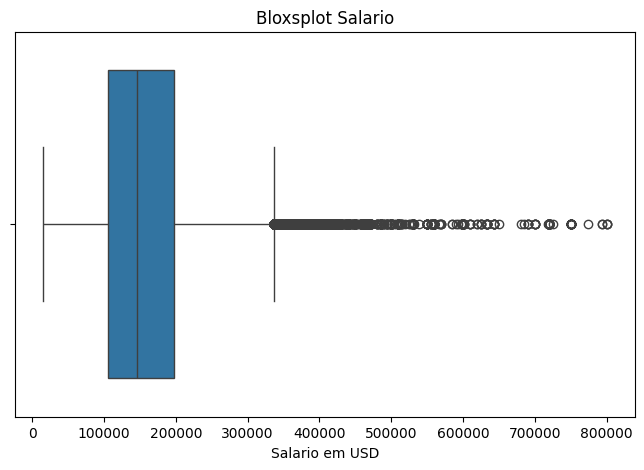

In [58]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Bloxsplot Salario')
plt.xlabel('Salario em USD')
#plt.ylabel('Salario medio anual em (Dolar)')
plt.show()

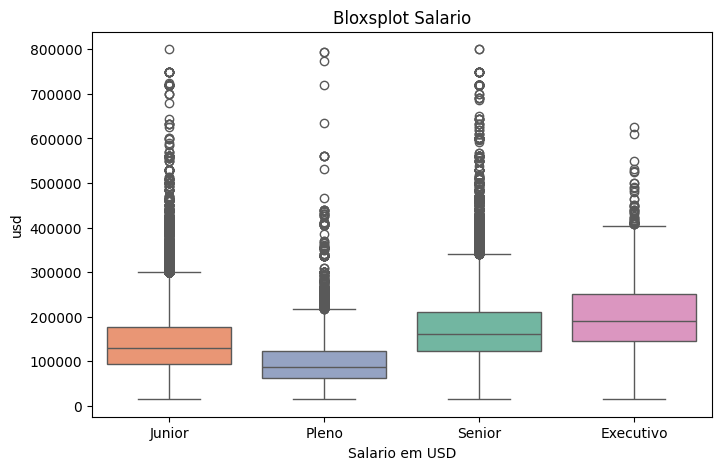

In [59]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Bloxsplot Salario')
plt.xlabel('Salario em USD')
#plt.ylabel('Salario medio anual em (Dolar)')
plt.show()

In [60]:
import plotly.express as px

In [83]:
# prompt: Crie um gráfico de média salarial por senioridade em barras usando o plotly

senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario, color='usd',
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()

In [85]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'
          )

fig.show()

In [86]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.update_traces(textinfo='percent+label')
fig.show()

In [64]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Parcial,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Tempo Parcial,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Junior,Tempo Parcial,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Junior,Tempo Parcial,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Pleno,Tempo Parcial,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [96]:
pip install pycountry

In [97]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()


In [91]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Tempo Parcial,Solutions Engineer,214000.0,USD,214000,US,Remoto,US,Media,USA
1,2025,Senior,Tempo Parcial,Solutions Engineer,136000.0,USD,136000,US,Remoto,US,Media,USA
2,2025,Junior,Tempo Parcial,Data Engineer,158800.0,USD,158800,AU,Presencial,AU,Media,AUS
3,2025,Junior,Tempo Parcial,Data Engineer,139200.0,USD,139200,AU,Presencial,AU,Media,AUS
4,2025,Pleno,Tempo Parcial,Data Engineer,90000.0,USD,90000,US,Presencial,US,Media,USA


In [92]:
import matplotlib